In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date, datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

pd.options.display.max_columns = 28
pd.options.display.max_rows = 100

In [2]:
#Import/Inspect data
data = pd.read_csv('Ecommerce_Consumer_Behavior_Analysis_Data.csv')
data

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,4,Mixed,5,5,2.00,NaN,Somewhat Sensitive,1,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,11,In-Store,3,1,2.00,Medium,Not Sensitive,1,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,2,Mixed,5,5,0.30,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,6,Mixed,3,1,1.00,High,Somewhat Sensitive,0,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,6,Mixed,3,4,0.00,Medium,Not Sensitive,2,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20-562-2569,44,Female,High,Divorced,Bachelor's,High,Aramayuan,Mobile Accessories,$463.67,5,Online,2,4,0.30,High,Not Sensitive,2,4,NaN,Tablet,PayPal,7/7/2024,True,False,Need-based,Standard,5
996,41-366-4205,50,Female,High,Single,High School,Middle,Paquera,Gardening & Outdoors,$69.78,9,Mixed,4,3,2.00,Low,Very Sensitive,0,6,Low,Tablet,Cash,3/28/2024,True,False,Wants-based,No Preference,9
997,77-241-7621,26,Male,High,Married,Bachelor's,High,Warudoyong,Food & Beverages,$453.37,10,Mixed,1,1,2.00,Low,Very Sensitive,0,6,High,Desktop,Credit Card,3/11/2024,True,True,Wants-based,Express,9
998,53-091-2176,21,Female,High,Widowed,Bachelor's,Middle,Béziers,Baby Products,$106.15,12,In-Store,4,4,0.30,Low,Somewhat Sensitive,0,5,Medium,Desktop,Cash,3/30/2024,True,True,Impulsive,Standard,8


# 1 Preprocessing/Feature Engineering

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [4]:
#Check duplicated values
data['Customer_ID'].duplicated().sum()

0

In [5]:
#Delect '$' in Purchase_Amount
data['Purchase_Amount'] = data['Purchase_Amount'].str.replace('$','')

#Change type in Purchase_Amount
data['Purchase_Amount'] = data['Purchase_Amount'].astype('float64')

#Change type in Time_of_Purchase in datetime
data['Time_of_Purchase'] = pd.to_datetime(data['Time_of_Purchase'])

#Extract month from Time_of_Purchase
data['Month_of_Purchase'] = data['Time_of_Purchase'].dt.month

In [6]:
#Add Column Last Activity for the RFM-Analysis
data['Last_Activity (days)'] = datetime.today() - data['Time_of_Purchase']
data['Last_Activity (days)'] = data['Last_Activity (days)'].dt.days

#Drop columns
#data = data.drop(columns=['Month_of_Purchase','Time_of_Purchase'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Customer_ID                            1000 non-null   object        
 1   Age                                    1000 non-null   int64         
 2   Gender                                 1000 non-null   object        
 3   Income_Level                           1000 non-null   object        
 4   Marital_Status                         1000 non-null   object        
 5   Education_Level                        1000 non-null   object        
 6   Occupation                             1000 non-null   object        
 7   Location                               1000 non-null   object        
 8   Purchase_Category                      1000 non-null   object        
 9   Purchase_Amount                        1000 non-null   float64  

In [8]:
#Check na´s
data.isna().sum()

Customer_ID                                0
Age                                        0
Gender                                     0
Income_Level                               0
Marital_Status                             0
Education_Level                            0
Occupation                                 0
Location                                   0
Purchase_Category                          0
Purchase_Amount                            0
Frequency_of_Purchase                      0
Purchase_Channel                           0
Brand_Loyalty                              0
Product_Rating                             0
Time_Spent_on_Product_Research(hours)      0
Social_Media_Influence                   247
Discount_Sensitivity                       0
Return_Rate                                0
Customer_Satisfaction                      0
Engagement_with_Ads                      256
Device_Used_for_Shopping                   0
Payment_Method                             0
Time_of_Pu

In [9]:
#Check na´s in Social_Media_Influence and Egagement_with_Ads
print(data['Social_Media_Influence'].value_counts(dropna=False))
print('')
print(data['Engagement_with_Ads'].value_counts(dropna=False))

Social_Media_Influence
High      268
Low       249
NaN       247
Medium    236
Name: count, dtype: int64

Engagement_with_Ads
High      270
NaN       256
Medium    244
Low       230
Name: count, dtype: int64


In [10]:
'''NAs in Social_Media_Influence and Engagement_with_Ads will be treated as "No" '''

#Fill NA with 'No' in Social_Media_Influence
data['Social_Media_Influence'] = data['Social_Media_Influence'].fillna('No')

#Fill NA with 'No' in Engagement_with_Ads
data['Engagement_with_Ads'] = data['Engagement_with_Ads'].fillna('No')

In [11]:
#Check pattern in Customer_ID
data['Customer_ID'].str.match('^\\d{2}-\\d{3}-\\d{4}$',na=False).all()

True

In [12]:
#Round values in Time_Spent_on_Product_Research(hours)
data['Time_Spent_on_Product_Research(hours)'] = np.round(data['Time_Spent_on_Product_Research(hours)'])

#Change type in Time_Spent_on_Product_Research(hours)
data['Time_Spent_on_Product_Research(hours)'] = data['Time_Spent_on_Product_Research(hours)'].astype('int64')

In [13]:
#Group Gender characteristics in 'Other'
data['Gender'] = data['Gender'].apply(lambda x: 'Other' if x not in ('Male','Female') else x)

In [14]:
#Check characteristics in columns with type object and not Location and Customer_ID
for column in data:
    if data[column].dtype == 'object' and column not in ('Customer_ID','Location'):
        print(f'{column}: {data[column].unique()}')

Gender: ['Female' 'Male' 'Other']
Income_Level: ['Middle' 'High']
Marital_Status: ['Married' 'Single' 'Widowed' 'Divorced']
Education_Level: ["Bachelor's" 'High School' "Master's"]
Occupation: ['Middle' 'High']
Purchase_Category: ['Gardening & Outdoors' 'Food & Beverages' 'Office Supplies'
 'Home Appliances' 'Furniture' 'Books' 'Sports & Outdoors'
 'Mobile Accessories' 'Luxury Goods' 'Animal Feed' 'Health Care' 'Hotels'
 'Packages)' 'Electronics' 'Software & Apps' 'Baby Products'
 'Toys & Games' 'Arts & Crafts' 'Health Supplements' 'Groceries'
 'Clothing' 'Beauty & Personal Care' 'Travel & Leisure (Flights'
 'Jewelry & Accessories']
Purchase_Channel: ['Mixed' 'In-Store' 'Online']
Social_Media_Influence: ['No' 'Medium' 'Low' 'High']
Discount_Sensitivity: ['Somewhat Sensitive' 'Not Sensitive' 'Very Sensitive']
Engagement_with_Ads: ['No' 'High' 'Low' 'Medium']
Device_Used_for_Shopping: ['Tablet' 'Smartphone' 'Desktop']
Payment_Method: ['Credit Card' 'PayPal' 'Debit Card' 'Other' 'Cash']
P

In [15]:
#Delete brackets in Purchase Categories
data['Purchase_Category'] = data['Purchase_Category'].replace('Travel & Leisure (Flights','Travel & Leisure Flights')
data['Purchase_Category'] = data['Purchase_Category'].replace('Packages)','Packages')


In [16]:
'''Location has 969 unique values. Therefore it will be deleted because no API has been found yet 
   to extract information like population to group it, for example'''

data = data.drop(columns=['Customer_ID','Location'])

In [17]:
##split data in nominal/ordinal/metric subsets

#nominal subset
data_nominal = data[['Gender','Marital_Status','Occupation','Purchase_Category','Purchase_Channel','Device_Used_for_Shopping','Payment_Method','Discount_Used',
                'Customer_Loyalty_Program_Member','Purchase_Intent','Shipping_Preference']].copy()

#ordinal subset
data_ordinal = data[['Income_Level','Education_Level','Brand_Loyalty','Product_Rating','Social_Media_Influence',
                'Discount_Sensitivity','Customer_Satisfaction','Engagement_with_Ads']].copy()

#metric subset
data_metric = data[['Age','Purchase_Amount','Frequency_of_Purchase','Time_Spent_on_Product_Research(hours)',
               'Return_Rate','Time_to_Decision','Last_Activity (days)']].copy()

# 2 Distribution/Correlation/Feature Selection

## 2.1 Nominal Variables

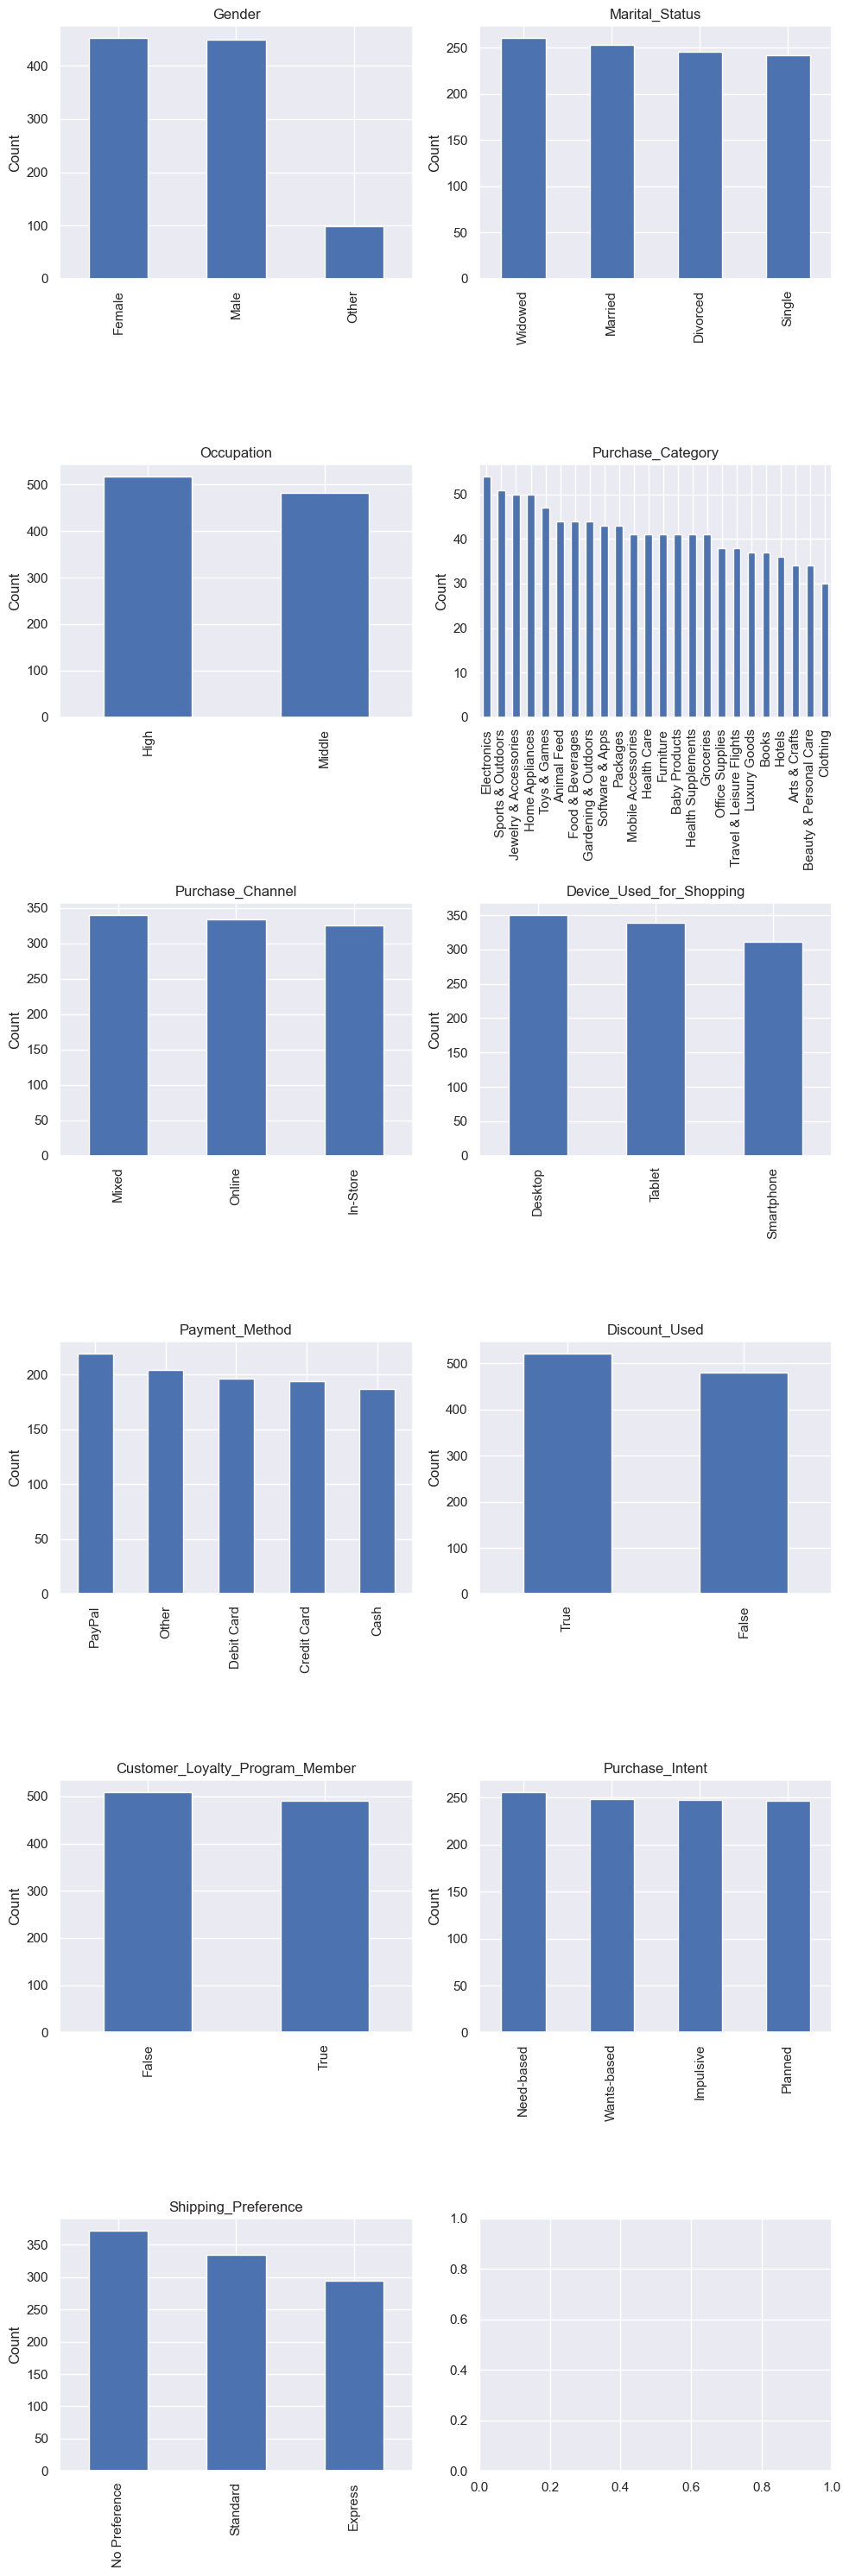

In [18]:
fig, axes = plt.subplots(ncols=2, nrows=6, figsize=(10, 30))
axes = axes.flatten()

for i,col in enumerate(data_nominal):
    data_nominal[col].value_counts().plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

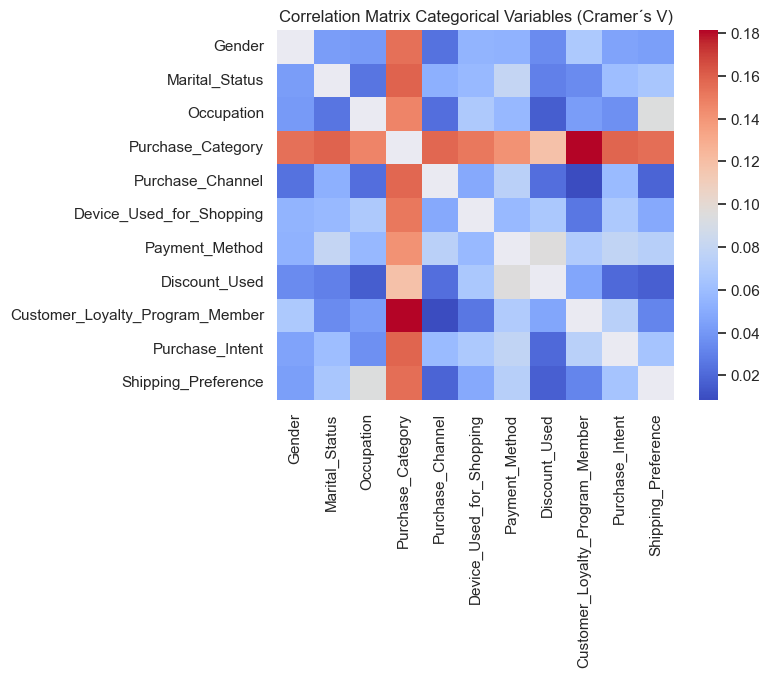

In [19]:
#Correlation Categorical Variables


##Define Cramers´s V
from scipy.stats import chi2_contingency

def cramersv (x,y):

    #Chi2
    chi2_conting = pd.crosstab(x,y)
    chi2, p, _, _ = chi2_contingency(chi2_conting)

    #CramersV
    n = chi2_conting.sum().sum()
    r, k = chi2_conting.shape
    m = min(r - 1, k - 1)
    v = np.sqrt(chi2 / (n * m))
    
    return v,p


#########################################################################################

from itertools import combinations

#Create empty Dataframe
corr_matrix = pd.DataFrame(index=data_nominal.columns, columns=data_nominal.columns, dtype=float)

#Iterate throu combinations
for col1, col2 in combinations(data_nominal.columns, 2):
    v = cramersv(data[col1], data[col2])

    #Append values to Dataframe
    corr_matrix.loc[col1, col2] = v[0]
    corr_matrix.loc[col2, col1] = v[0]

#Plot
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation Matrix Categorical Variables (Cramer´s V)')
plt.grid('')
plt.show()

## 2.2 Ordinal Variables

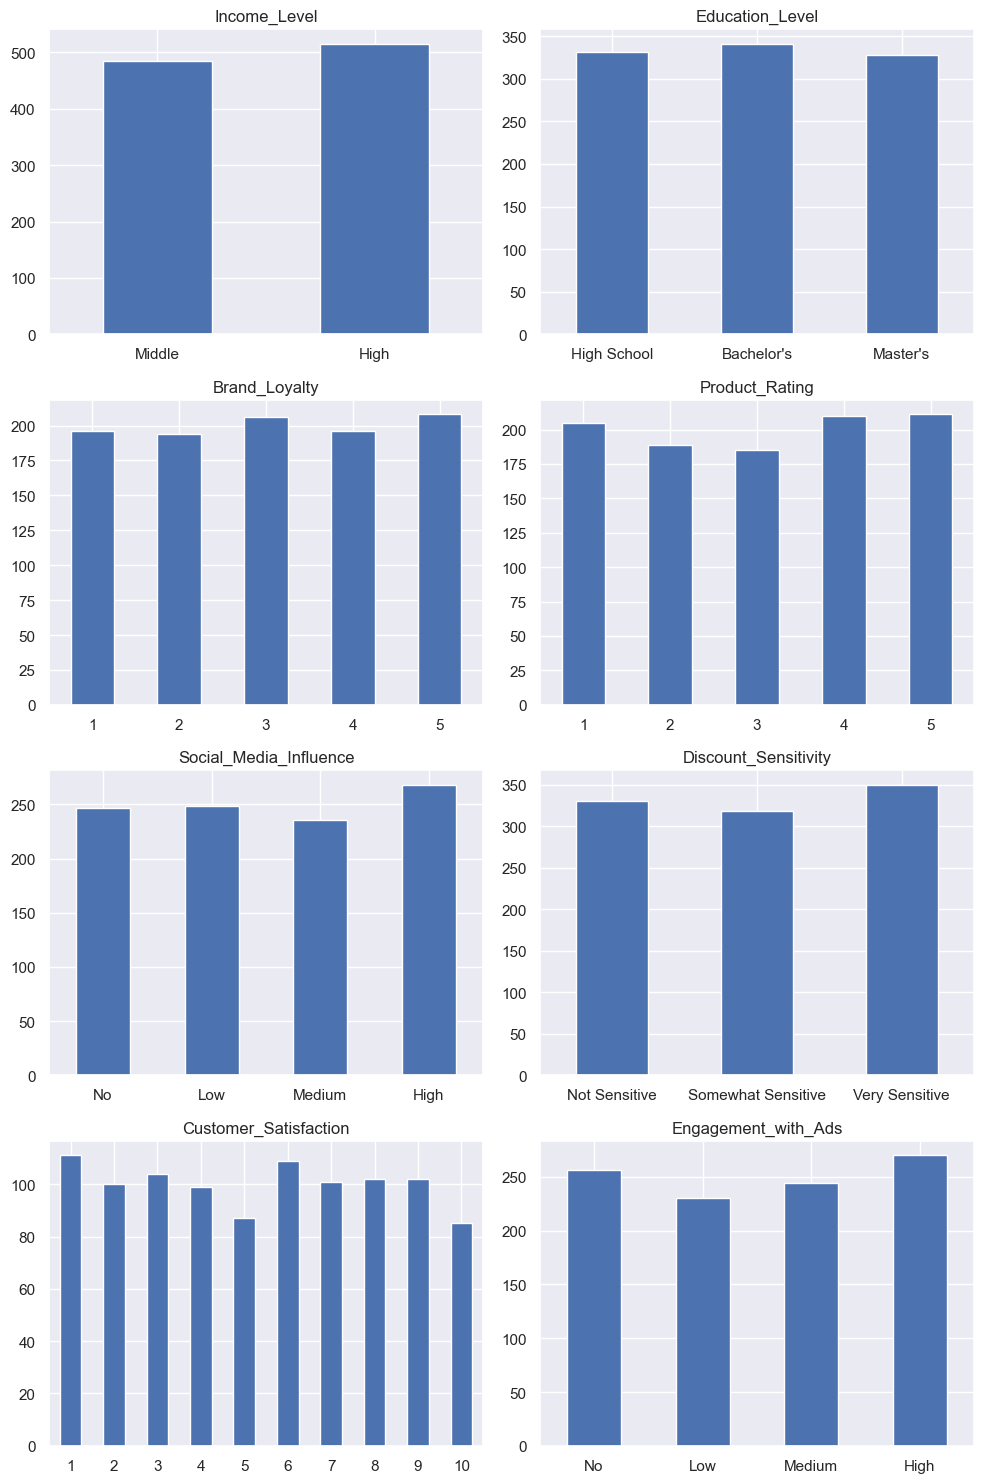

In [20]:
cat_ordinal = {'Income_Level':['Middle','High'],
              'Education_Level':['High School',"Bachelor's","Master's"],
              'Brand_Loyalty':[1,2,3,4,5],
              'Product_Rating':[1,2,3,4,5],
              'Social_Media_Influence':['No','Low','Medium','High'],
              'Discount_Sensitivity':['Not Sensitive','Somewhat Sensitive','Very Sensitive'],
              'Customer_Satisfaction':[1,2,3,4,5,6,7,8,9,10],
              'Engagement_with_Ads':['No','Low','Medium','High']}


fig, axes = plt.subplots(ncols=2,nrows=4,figsize=(10,15))
axes = axes.flatten()

for i, (col, cat) in enumerate(cat_ordinal.items()):
    pd.Categorical(data_ordinal[col], categories=cat).value_counts().plot(kind='bar',ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 2.3 Metric Variables

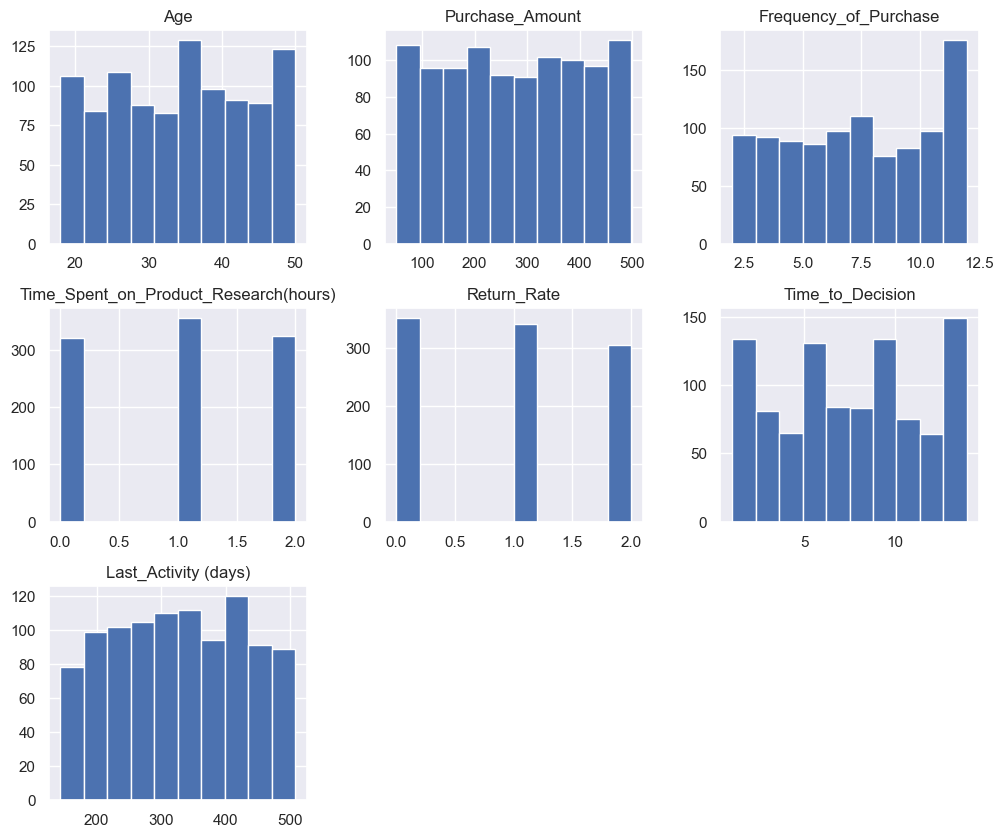

In [21]:
data_metric.hist(figsize=(12,10));

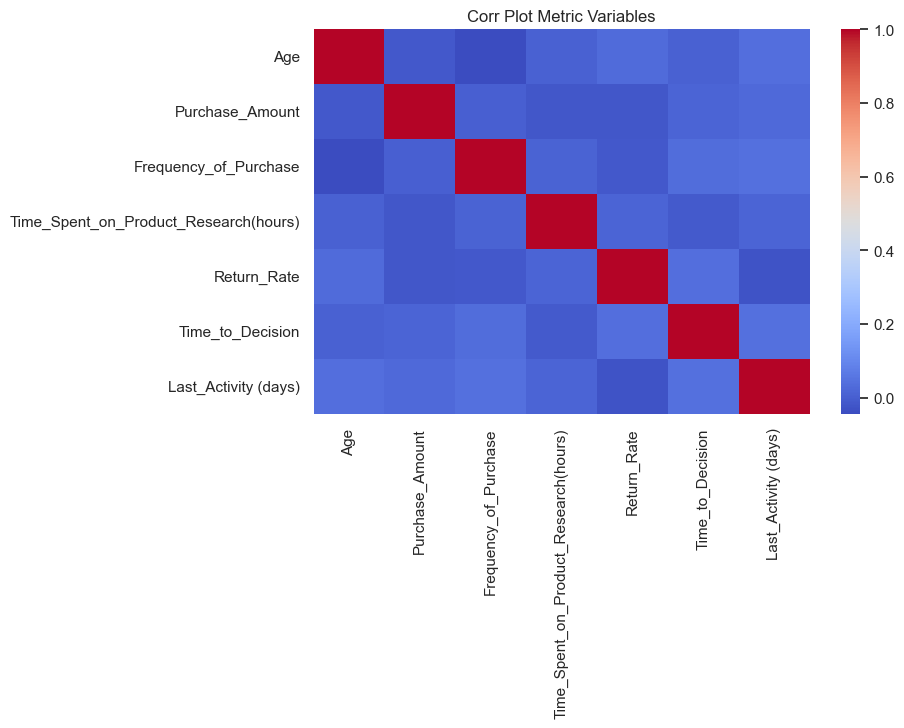

In [22]:
#Correlation Metric Variables
corr = data_metric.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr,cmap='coolwarm')
plt.title('Corr Plot Metric Variables');

In [23]:
#Check if any value/correlation is greater then 0.5
print(corr[(corr > 0.5) & (corr != 1)].sum())

Age                                      0.0
Purchase_Amount                          0.0
Frequency_of_Purchase                    0.0
Time_Spent_on_Product_Research(hours)    0.0
Return_Rate                              0.0
Time_to_Decision                         0.0
Last_Activity (days)                     0.0
dtype: float64


In [24]:
#Rearange ordinal variables

data_ordinal['Income_Level'] = data_ordinal['Income_Level'].map({'Middle':1,'High':2})
data_ordinal['Education_Level'] = data_ordinal['Education_Level'].map({'High School':1,"Bachelor's":2,"Master's":3})
data_ordinal['Social_Media_Influence'] = data_ordinal['Social_Media_Influence'].map({'No':1,'Low':2,'Medium':3,'High':4})
data_ordinal['Discount_Sensitivity'] = data_ordinal['Discount_Sensitivity'].map({'Not Sensitive':1,'Somewhat Sensitive':2,'Very Sensitive':3})
data_ordinal['Engagement_with_Ads'] = data_ordinal['Engagement_with_Ads'].map({'No':1,'Low':2,'Medium':3,'High':4})

#########################################################################################

#MinMax Scale data_metric

from sklearn.preprocessing import MinMaxScaler

#Instantiate MinMaxScaler
mms = MinMaxScaler()

#Fit transform minmax scaler
data_metric_scale = mms.fit_transform(data_metric)

#Create DataFrame
data_metric_scale_df = pd.DataFrame(data_metric_scale,columns=data_metric.columns)

#########################################################################################

#Concat nominal, ordinal and metric dataframes
data_concat = pd.concat([data_ordinal,data_nominal,data_metric_scale_df],axis=1)

# 3 Clustering

In [25]:
'''Gower Distance will be used due to mixed data types'''

import gower    

gower_matrix = gower.gower_matrix(data_concat)
gower_matrix.shape

(1000, 1000)

## 3.1 Hierarchical Clustering

C:\Users\flori\AppData\Local\Temp\ipykernel_41388\542400042.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_data = linkage(gower_matrix, method='average') #complete


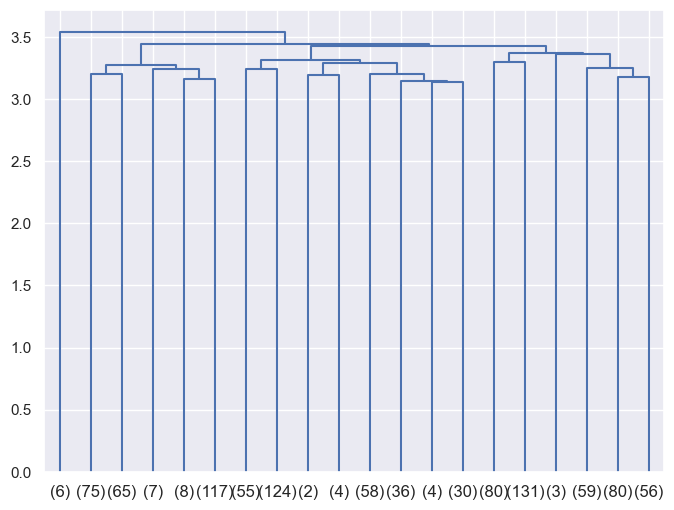

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage_data = linkage(gower_matrix, method='average') #complete

plt.figure(figsize=(8,6))
dendrogram = dendrogram(linkage_data,truncate_mode='lastp', p=20)

In [27]:
from sklearn.metrics import silhouette_score

#Create clusters
clusters_hc = fcluster(linkage_data, t=8, criterion='maxclust')

#Silhouette Score
score_hc= silhouette_score(gower_matrix, clusters_hc, metric='precomputed')
score_hc

0.018728154

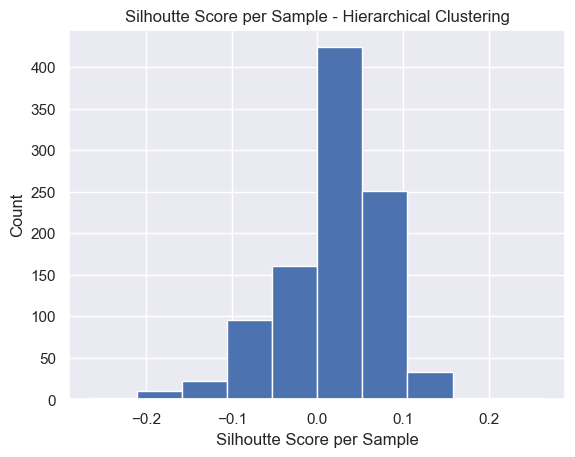

In [28]:
#Sillhouette Score per sample

from sklearn.metrics import silhouette_samples

#Compute Sillhouette samples
sil_samples = silhouette_samples(gower_matrix,clusters_hc,metric='precomputed')

pd.Series(sil_samples).hist()
plt.title('Silhoutte Score per Sample - Hierarchical Clustering')
plt.ylabel('Count')
plt.xlabel('Silhoutte Score per Sample');

## 3.2 DBSCAN

In [29]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5,metric='precomputed')

clusters_dbscan = dbscan.fit_predict(gower_matrix)

score_dbscan = silhouette_score(gower_matrix,clusters_dbscan,metric='precomputed')
score_dbscan

-0.16120397

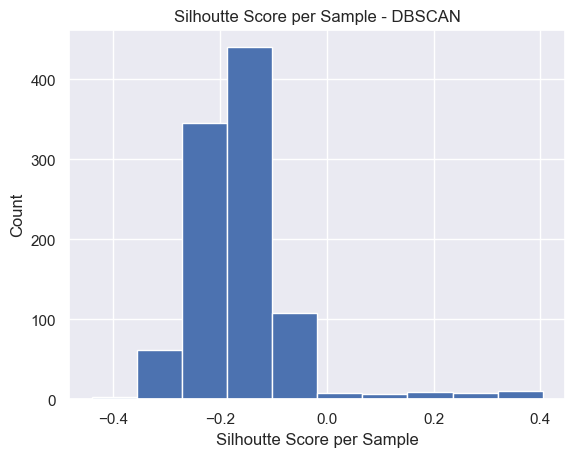

In [30]:
#Sillhouette Score per sample

from sklearn.metrics import silhouette_samples

sil_samples = silhouette_samples(gower_matrix,clusters_dbscan,metric='precomputed')

pd.Series(sil_samples).hist()
plt.title('Silhoutte Score per Sample - DBSCAN')
plt.ylabel('Count')
plt.xlabel('Silhoutte Score per Sample');

In [43]:
# #Save figure

# plt.figure(figsize=((10,4)))

# plt.subplot(1,2,1)
# pd.Series(sil_samples).hist()
# plt.title('Silhoutte Score per Sample - Hierarchical Clustering')
# plt.ylabel('Count')
# plt.xlabel('Silhoutte Score per Sample')
# plt.text(0,400,f'Silhoutte score: {score_hc:.4f}',bbox=dict(edgecolor='black',facecolor='white'))

# plt.subplot(1,2,2)
# pd.Series(sil_samples).hist()
# plt.title('Silhoutte Score per Sample - DBSCAN')
# plt.ylabel('Count')
# plt.xlabel('Silhoutte Score per Sample')
# plt.text(0,400,f'Silhoutte score: {score_dbscan:.4f}',bbox=dict(edgecolor='black',facecolor='white'))

# plt.tight_layout()

## 3.3 PCA

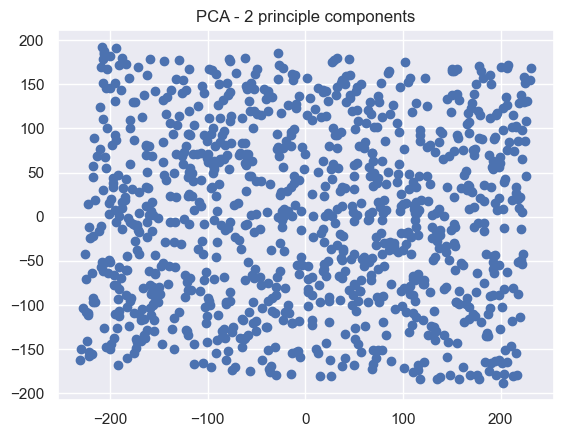

In [32]:
# Principal Component Analysis on metric data

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
proj = pca.fit_transform(data_metric)

plt.scatter(proj[:,0], proj[:,1])
plt.title('PCA - 2 principle components')
plt.show()

# 4 RFM Segmentation

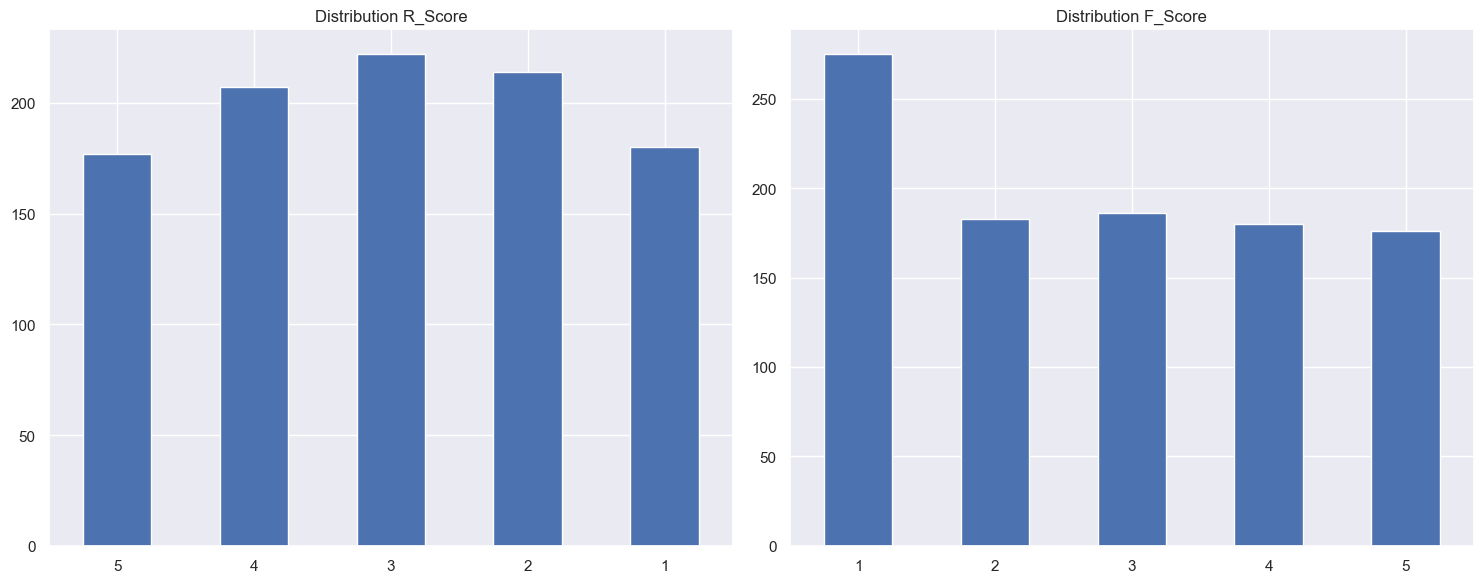

In [33]:
'''
The variable 'Time_of_Purchase' will be treated as the last purchase customer made. This assumption based on the 
non duplicated values in Customer ID. It is reflected by the variable 'Last_Activity (days)'.
The M_Score will be exluded. This is done because of the complexity of segmentating a 5x5x5 matrix (125 combinations).
Therefore only the R and F Score will be included which results in a 5x5 matrix (25 combinations). 

R_Score: Recency
F_Score: Frequency
M_Score: Monetary

'''

#Dictionary value order / 5 bins
rfm_cat = {'R_Score':['very_recently_active','recently_active','moderately_active','inactive','very_inactive'],
           'F_Score':['very_infrequent','infrequent','moderate','frequent','very_frequent'],
           'M_Score':['very_low','low','medium','high','very_high']}

#Dictionary value order / 5 bins in numeric
rfm_cat_num = {'R_Score':[5,4,3,2,1], #This scale is turn around: (5 = very recently active; 1 = very inactive)
               'F_Score':[1,2,3,4,5],
               'M_Score':[1,2,3,4,5]}


#Segmentation Scores into 5 bins
data['R_Score'] = pd.cut(data['Last_Activity (days)'], bins=5, labels=rfm_cat_num['R_Score']).astype(int)
data['F_Score'] = pd.cut(data['Frequency_of_Purchase'], bins=5, labels=rfm_cat_num['F_Score']).astype(int)
# data['M_Score'] = pd.cut(data['Purchase_Amount'], bins=5, labels=rfm_cat_num['M_Score']).astype(int)

#Calculate RFM Score
#data['RFM_Score'] = (data[['R_Score','F_Score']].sum(axis=1) / 3).round()

#Create RFM Segments based on Scores
data['RFM_Segments'] = data[['R_Score','F_Score']].values.tolist()

#Plot score distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

for i, score in enumerate(['R_Score','F_Score']):
    pd.Categorical(data[score],
                   categories=rfm_cat_num[score],
                   ordered=True).value_counts().plot(kind='bar',
                                                     title=f'Distribution {score}',
                                                     ax=axes[i],ylabel='')

    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()

In [34]:
#Cluster customers based on rfm_segments

def segmentation(x):
    if x['R_Score'] in [4, 5] and x['F_Score'] == 5:
        return 'Top_Customers'
    elif x['R_Score'] in [3,4,5] and x['F_Score'] in [3,4,5]:
        return 'Loyal_Customers'
    elif x['R_Score'] in [1,2] and x['F_Score'] in [3,4,5]:
        return 'Sleepy_Customers'
    elif x['R_Score'] in [3,4,5] and x['F_Score'] in [1,2]:
        return 'At_Risk_Customers'
    elif x['R_Score'] in [1,2] and x['F_Score'] in [1,2]:
        return 'Almost_Lost_Customers'
    else:
        return 'not_assigned'
    

data['Clusters'] = data.apply(segmentation,axis=1)

In [35]:
#Check if not_assign customers exist / proportion
data['Clusters'].value_counts(normalize=True) * 100

Clusters
At_Risk_Customers        28.4
Loyal_Customers          25.3
Sleepy_Customers         22.0
Almost_Lost_Customers    17.4
Top_Customers             6.9
Name: proportion, dtype: float64

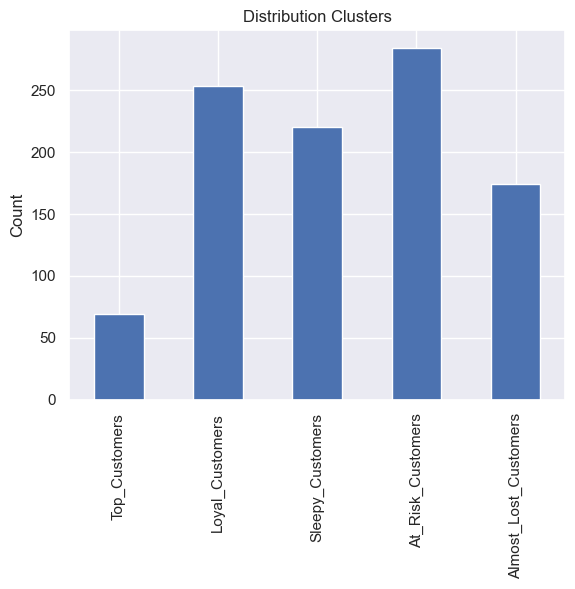

In [36]:
#Plot distribution clusters
pd.Categorical(data['Clusters'],
               categories=['Top_Customers','Loyal_Customers','Sleepy_Customers','At_Risk_Customers','Almost_Lost_Customers'],
               ordered=True).value_counts().plot(kind='bar',title='Distribution Clusters',ylabel='Count');

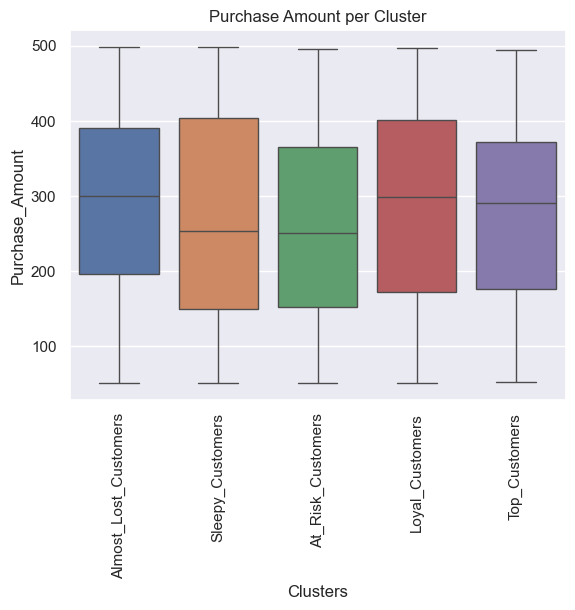

In [37]:
#Distribution purchase amount per cluster
sns.boxplot(data=data,x='Clusters',y='Purchase_Amount',hue='Clusters')
plt.xticks(rotation=90)
plt.title('Purchase Amount per Cluster');

In [38]:
#Describe clusters
data.groupby('Clusters')['Purchase_Amount'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
Almost_Lost_Customers,174.0,288.0,127.0,51.0,196.0,300.0,391.0,498.0
At_Risk_Customers,284.0,260.0,129.0,51.0,153.0,251.0,365.0,496.0
Loyal_Customers,253.0,288.0,132.0,51.0,172.0,299.0,402.0,498.0
Sleepy_Customers,220.0,270.0,137.0,51.0,150.0,254.0,404.0,498.0
Top_Customers,69.0,275.0,130.0,52.0,176.0,291.0,372.0,495.0


# 5 Softmax Regression

In [39]:
#Preprocessing

##One Hot Encoding nominal data
data_nominal_scale = pd.get_dummies(data_nominal,drop_first=True,dtype=int)

data_nominal_scale['Discount_Used'] = data_nominal_scale['Discount_Used'].map({True:1,False:0}).astype(int)
data_nominal_scale['Customer_Loyalty_Program_Member'] = data_nominal_scale['Customer_Loyalty_Program_Member'].map({True:1,False:0}).astype(int)

clusters_dict = {'Top_Customers':0,
                 'Loyal_Customers':1,
                 'Sleepy_Customers':2,
                 'At_Risk_Customers':3,
                 'Almost_Lost_Customers':4
                 }

##Concat data
data_concat_ml = pd.concat([data_ordinal,data_nominal_scale,data_metric,data['Clusters']],axis=1)

##Encode Feature 'Clusters'
data_concat_ml['Clusters'] = data['Clusters'].map(clusters_dict)

In [40]:
#Train/Test Split

from sklearn.model_selection import train_test_split


#Extract X and y features
X = data_concat_ml.drop(columns='Clusters')
y = data_concat_ml['Clusters']

#Train/Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42,stratify=y)

#Fit/Transform metric data
X_train_mms = mms.fit_transform(X_train[data_metric.columns])
X_test_mms = mms.transform(X_test[data_metric.columns])

#Create Dataframe with scaled metric data
X_train_mms_df = pd.DataFrame(X_train_mms, columns=data_metric.columns, index=X_train.index)
X_test_mms_df = pd.DataFrame(X_test_mms, columns=data_metric.columns, index=X_test.index)

#Drop metric columns
X_train_rest = X_train.drop(columns=data_metric.columns)
X_test_rest = X_test.drop(columns=data_metric.columns)

#Concat scaled metric data and rest data
X_train_concat = pd.concat([X_train_rest, X_train_mms_df], axis=1)
X_test_concat = pd.concat([X_test_rest, X_test_mms_df], axis=1)


#Delete features Purchase_Amount, Frequency_of_Purchase and Last_Activity (days)
'''Softmax Regression should predict new customers. New Customers dont have a purchase amount, frequency of purchase and last activity'''

X_train_final = X_train_concat.drop(columns=['Purchase_Amount','Frequency_of_Purchase','Last_Activity (days)'])
X_test_final = X_train_concat.drop(columns=['Purchase_Amount','Frequency_of_Purchase','Last_Activity (days)'])

In [41]:
#Softmax Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


#Param dict
param_grid_lr = {
    'solver':['sag'],
    'penalty':['l2'],
    'C':[0.001,0.01,0.1]
}

#Instantiate softmax Regression
lr = LogisticRegression(multi_class='multinomial',random_state=42,max_iter=1000)

#Instantiate GridsearchCV
search = GridSearchCV(estimator=lr,param_grid=param_grid_lr,cv=5,scoring='accuracy') #error_score='raise'

#Fit model
model_lr = search.fit(X_train_final,y_train)

best_params_lr = model_lr.best_params_
best_score_lr = model_lr.best_score_



##############################################################################################################


# #Track experiment


# import mlflow
# from mlflow.models.signature import infer_signature
# mlflow.set_tracking_uri(uri='http://127.0.0.1:8080')


# mlflow.set_experiment('Clustering')

# #start MlFlow run
# with mlflow.start_run():
#     mlflow.log_param("best_params", best_params_lr)
#     mlflow.log_param("param_dict", param_grid_lr)
#     mlflow.log_metric('accuracy', best_score_lr)
#     mlflow.set_tag("Training Info", "GridSearchCV Log Regression with Solver sag")

#     best_model_lr = model_lr.best_estimator_

#     # Infer signature
#     signature = infer_signature(X_train_final, best_model_lr.predict(X_train_final))

#     # Log Model
#     model_info_lr = mlflow.sklearn.log_model(
#         sk_model=best_model_lr,
#         artifact_path="Softmax Regression",
#         signature=signature,
#         input_example=X_train_final,
#         registered_model_name="Softmax Regression",
#     )

In [42]:
print(best_params_lr)
print(best_score_lr)

{'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}
0.28250000000000003
